In [35]:
import pandas as pd
from datetime import datetime,timedelta
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
monthly_data = pd.read_csv('D:\合作店铺\科帕奇_1\Agg Data\Monthly_Order_Finance.csv',index_col = 0)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\jackyzhu\AppData\Local\Temp\ipykernel_32852\561827564.py:1: SyntaxWarning: invalid escape sequence '\A'
  monthly_data = pd.read_csv('D:\合作店铺\科帕奇_1\Agg Data\Monthly_Order_Finance.csv',index_col = 0)


In [39]:
def Table_5_4(monthly_data):

    ## 选取2023年总销售额前十店铺作为top10 
    dates = [datetime.strptime(date, '%Y-%m') for date in monthly_data.date]
    max_date = max(dates)
    start_date = max_date - timedelta(days=365)
    selected_dates = [date.strftime('%Y-%m') for date in dates if start_date <= date <= max_date]
    latest_12_df = monthly_data[monthly_data['date'].isin(selected_dates)] 
    top_10_ids = latest_12_df.groupby(['seller_id'])['销售额'].sum().nlargest(10).index  
    top_10 = monthly_data[(monthly_data['seller_id'].isin(top_10_ids))].copy() 
    top_10 = top_10.groupby(['seller_id','date'])[['销量','回款']].sum().reset_index()
    le = LabelEncoder() ## 给店铺编号

    top_10['seller_code'] = le.fit_transform(top_10['seller_id'])
    
    ## 销量相关性
    sales_df = top_10.pivot(columns='seller_code',values = '销量',index= 'date').reset_index(drop=True)
    sales_corr = sales_df.corr().round(2)
    plt.figure(figsize=(20,20))
    ax = sns.heatmap(sales_corr,cmap='Blues',annot= True,annot_kws={'size': 20})
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    plt.xticks(fontsize = 20)
    plt.xlabel('Seller_Code', fontsize=14)
    plt.yticks(fontsize = 20)
    plt.ylabel('Seller_Code', fontsize=14)
    
    ###Output
    #plt.savefig('Table_5_4_销量相关性.jpg',dpi = 300)
    plt.show()
    ##回款相关性
    
    rec_df = top_10.pivot(columns='seller_code',values = '回款',index= 'date').reset_index(drop=True)
    rec_corr = rec_df.corr().round(2)
    plt.figure(figsize=(20,20))
    ax = sns.heatmap(rec_corr,cmap='Blues',annot= True,annot_kws={'size': 20})
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    plt.xticks(fontsize = 20)
    plt.xlabel('Seller_Code', fontsize=14)
    plt.yticks(fontsize = 20)
    plt.ylabel('Seller_Code', fontsize=14)

    ### Output
    #plt.savefig('Table_5_4_回款相关性.jpg',dpi = 300)
    plt.show()

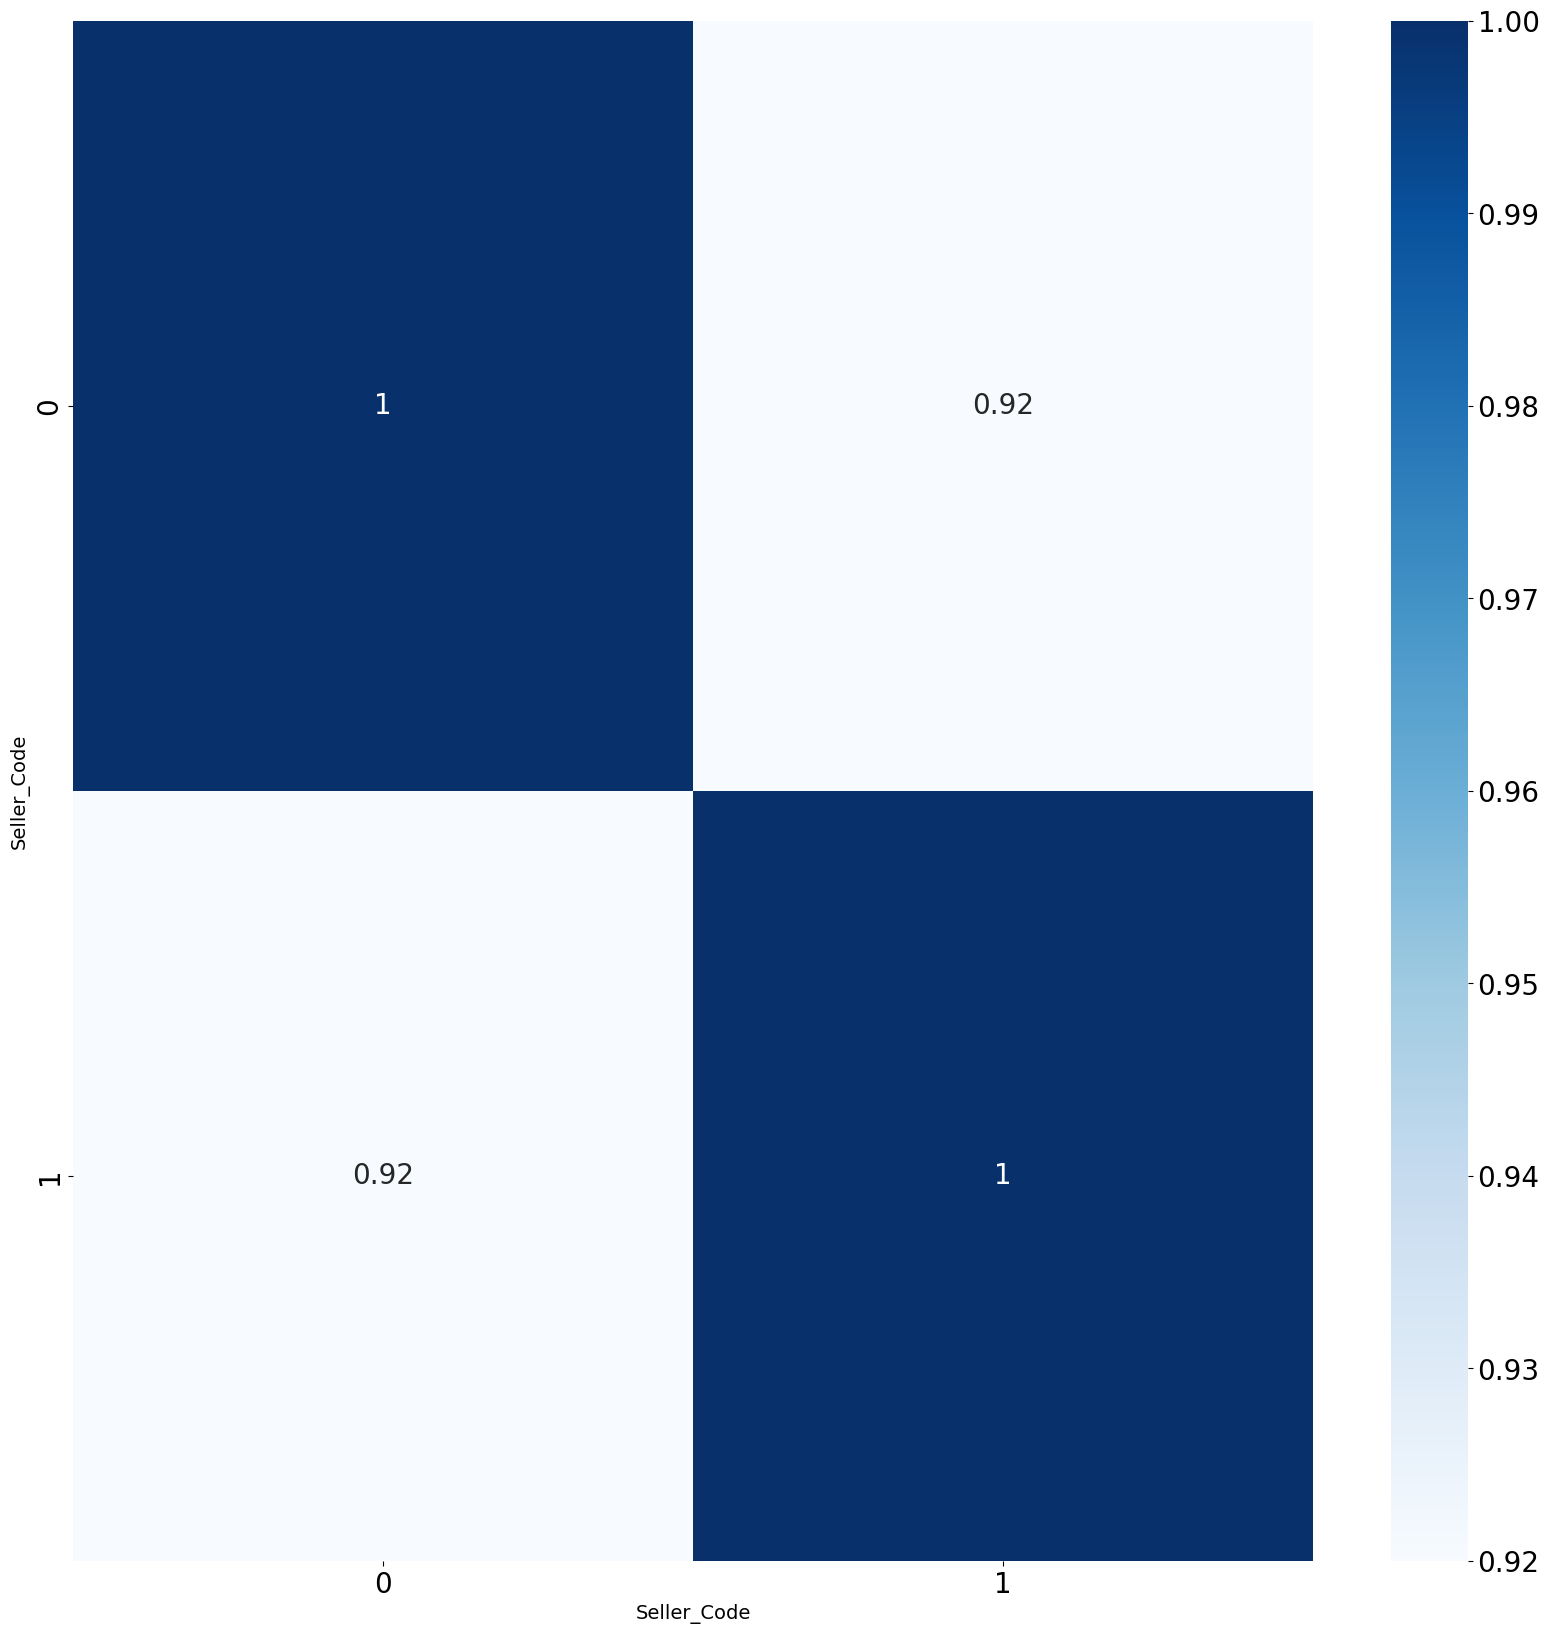

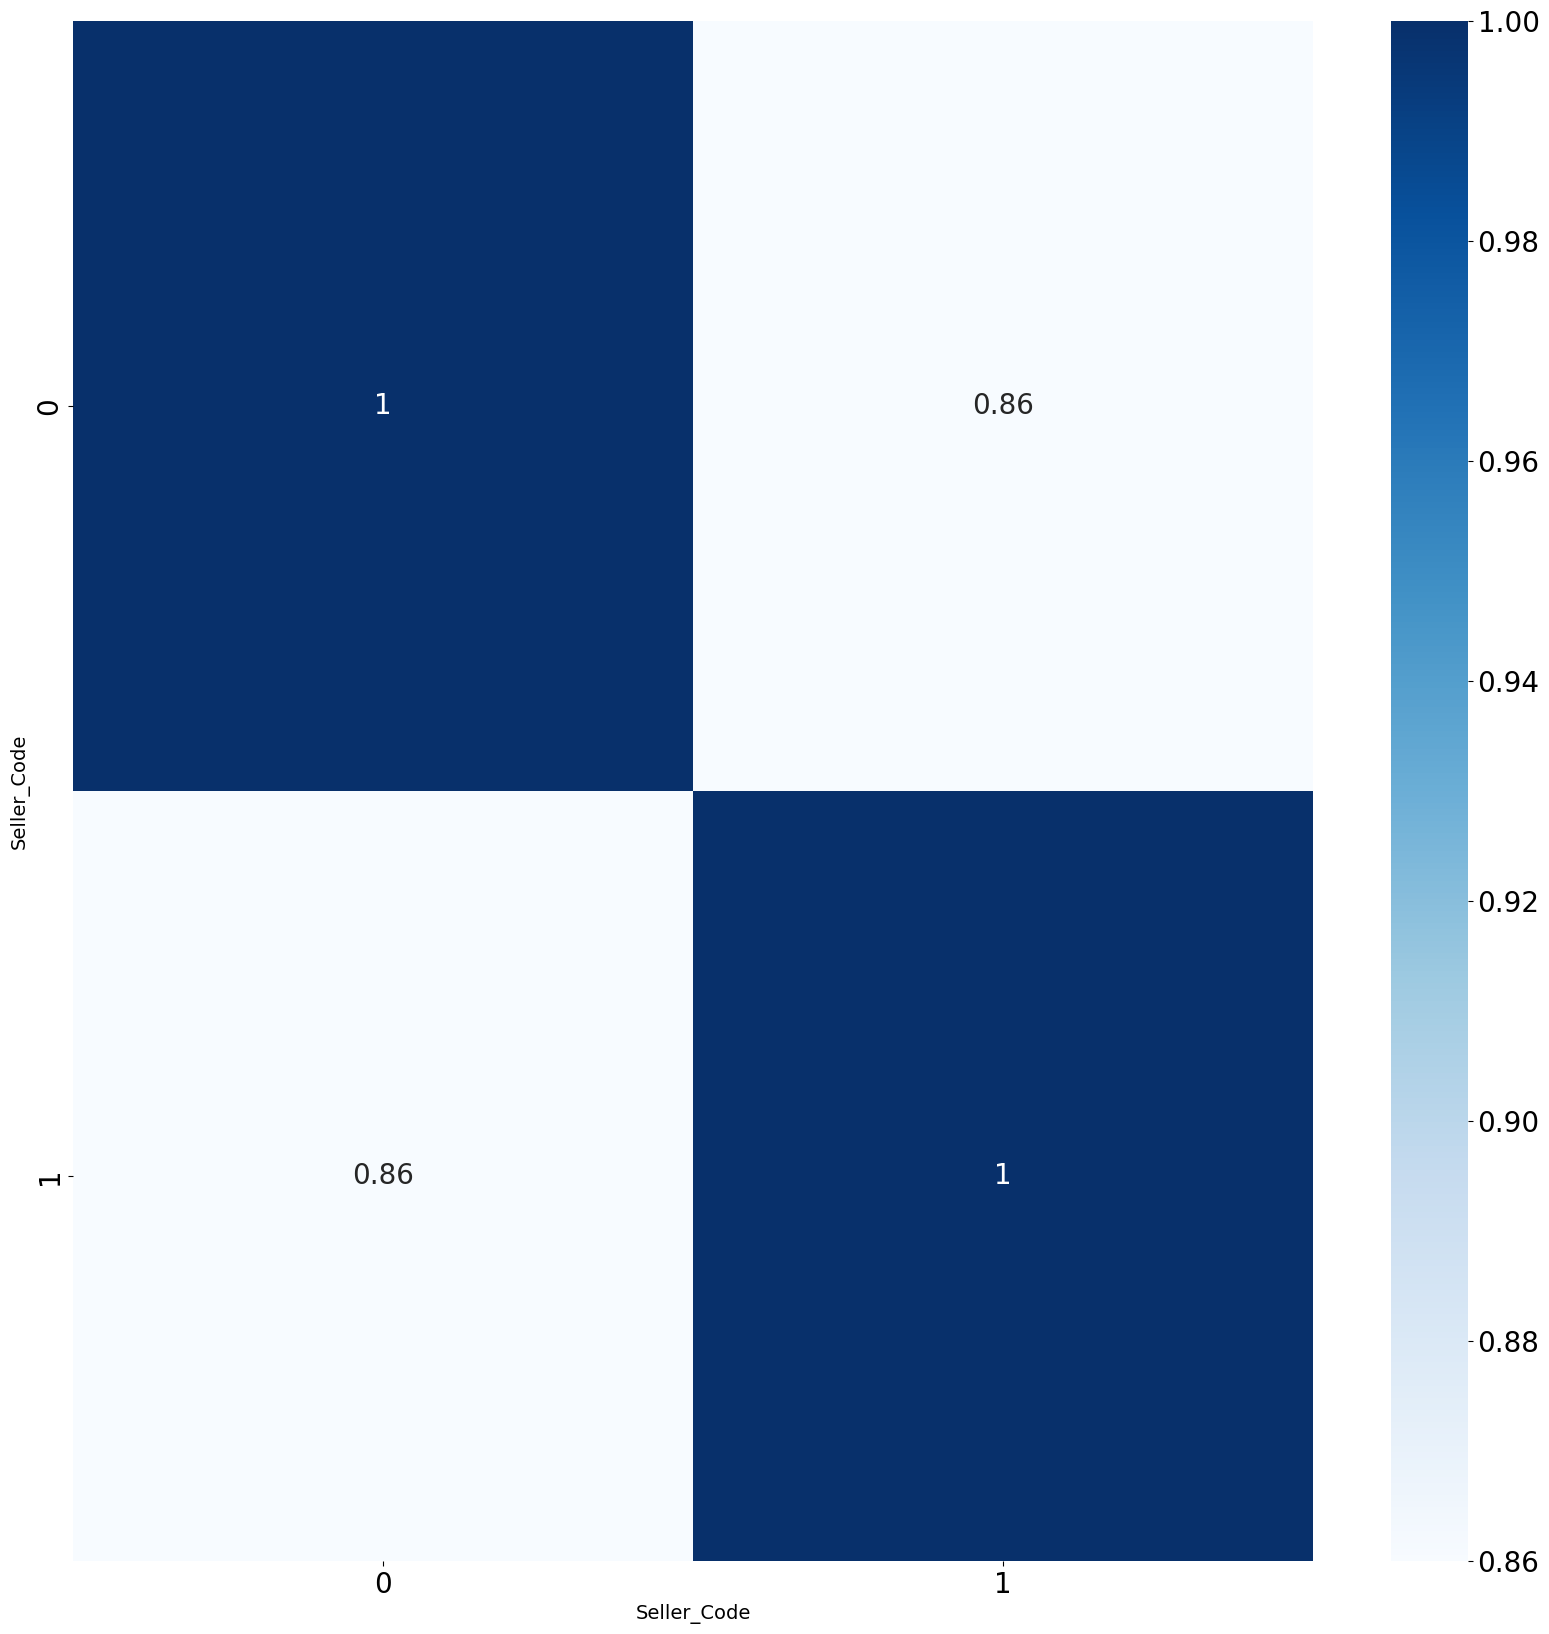

In [41]:
Table_5_4(monthly_data)